# EXERCISE 3 (Part A)

### AIM:
1. Explore the Frozen-Lake gride world environment in terms of the state space and the action space.
2. Explore and discuss the results on taking random actions, a pre-defined policy and taking actions based on Q-learning.
3. Visualize and the discuss the effect of changing the exploration- exploitation rate on the performance of the model.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd './drive/MyDrive/Exercises/Exercise 03'

/content/drive/MyDrive/Exercises/Exercise 03


Install required packages and libraries

In [4]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import seaborn as sb


## Task 1

#### We will work with the frozen lake environment:
- Details of the environment can be found at the official Gym documentation page: [Frozen Lake](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/)


"4x4" environment:
[ \
    "SFFF",\
    "FHFH",\
    "FFFH",\
    "HFFG"\
    ]
    
- key attributes: action space : Discrete(4)
    -- LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3
- Obesrvation space: Discrete (16) i.e 4 X 4 discrete possible states
- rewards:
    - Reach goal: 1
    - Reach hole: 0
    - Reach F: 0

#### Check the observation space and the action space for the environment

In [14]:
env = gym.make('FrozenLake-v1', is_slippery = True) # create the environment


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [15]:
env.observation_space

Discrete(16)

In [16]:
env.observation_space.sample()

1

In [17]:
env.action_space

Discrete(4)

## Task 2

### Performance based on random actions

In [18]:
# this is a demonstration , no modifications required here
n_games = 50000
# env = gym.make('FrozenLake-v1' , is_)
win_pct = []
scores = []
for i in range(n_games):
    done = False
    obs = env.reset()
    score = 0
    while not done:
        action = env.action_space.sample() # choose a random action
        obs, reward, done, info = env.step(action)
        score += reward
    scores.append(score)

    if i % 10 == 0:
        average = np.mean(scores[-10:])
        win_pct.append(average)

sb.histplot(win_pct)
# sb.lineplot(win_pct)
plt.show()

### Performance based on a pre-defined policy

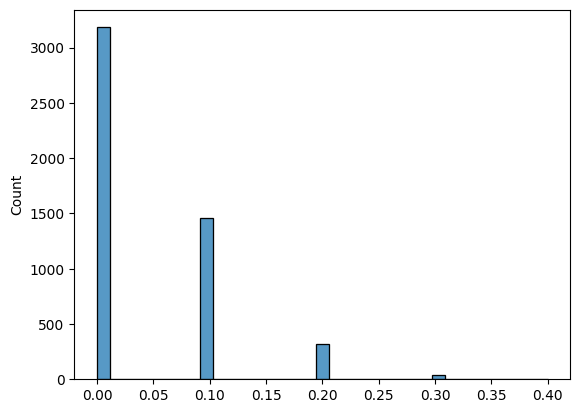

In [20]:
# you may change the policy
policy ={0:1, 1:2, 2:1, 3:0, 4:1, 6:1, 8:2, 9:1,  10:1, 13:2, 14:2}

n_games = 50000
# env = gym.make('FrozenLake-v1')
win_pct = []
scores = []
for i in range(n_games):
    done = False
    obs = env.reset()
    score = 0
    while not done:
        # print("observation", obs)
        action = policy[obs]
        # print(action)
        obs, reward, done, info = env.step(action)
        score += reward
    scores.append(score)

    if i % 10 == 0:
        average = np.mean(scores[-10:])
        win_pct.append(average)

# sb.lineplot(win_pct)
sb.histplot(win_pct)
plt.show( )

## Creating a Q-learning Agent

In [22]:
# Creating an agent based on the Q-learning algorithm
class Agent():
    def __init__(self, lr, gamma, n_actions, n_states, eps_start):
        self.lr = lr
        self.gamma = gamma
        self.n_actions = n_actions
        self.n_states = n_states
        self.epsilon = eps_start
        # self.eps_min = eps_end
        # self.eps_dec = eps_dec

        self.Q = {}

        self.init_Q()

    def init_Q(self):
        for state in range(self.n_states):
            for action in range(self.n_actions):
                self.Q[(state, action)] = 0.0

    def choose_action(self, state):
        # print("state", state)
        if np.random.random() < self.epsilon:
            action = np.random.choice([i for i in range(self.n_actions)])
        else:
            actions = np.array([self.Q[(state, a)] \
                                for a in range(self.n_actions)])
            # print('actions', actions)
            action = np.argmax(actions)
            # print("ACTION", action)
            # print("Q", self.Q)
            # print(" ")
        return action

    # def decrement_epsilon(self):
    #     self.epsilon = self.epsilon*self.eps_dec if self.epsilon>self.eps_min\
    #                    else self.eps_min

    def learn(self, state, action, reward, state_):
        actions = np.array([self.Q[(state_, a)] for a in range(self.n_actions)])
        a_max = np.argmax(actions)

        self.Q[(state, action)] += self.lr*(reward +
                                        self.gamma*self.Q[(state_, a_max)] -
                                        self.Q[(state, action)])
        # self.decrement_epsilon()

***eps_start*** is the parameter that is changed

### Fixed epsilon (high)

In [23]:

env = gym.make('FrozenLake-v1')
agent = Agent(lr=0.001, gamma=0.9, eps_start=0.7, n_actions = 4, n_states = 16)

# eps_end = 0.01
#decrement = 0.9999995
scores = []
win_pct_list_high_eps = []
n_games = 500000

for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        agent.learn(observation, action, reward, observation_)
        score += reward
        observation = observation_
    scores.append(score)

    if i % 100 == 0:
        win_pct = np.mean(scores[-100:])
        win_pct_list_high_eps.append(win_pct)
        if i % 1000 == 0:
            print('episode ', i, 'win pct %.2f' % win_pct,
                  'epsilon %.2f' % agent.epsilon)
#     plt.plot(win_pct_list_high_eps)
#     plt.show()
# sb.histplot(win_pct_list_high_eps)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


episode  0 win pct 0.00 epsilon 0.70
episode  1000 win pct 0.02 epsilon 0.70
episode  2000 win pct 0.01 epsilon 0.70
episode  3000 win pct 0.02 epsilon 0.70
episode  4000 win pct 0.02 epsilon 0.70
episode  5000 win pct 0.00 epsilon 0.70
episode  6000 win pct 0.01 epsilon 0.70
episode  7000 win pct 0.03 epsilon 0.70
episode  8000 win pct 0.01 epsilon 0.70
episode  9000 win pct 0.00 epsilon 0.70
episode  10000 win pct 0.03 epsilon 0.70
episode  11000 win pct 0.00 epsilon 0.70
episode  12000 win pct 0.02 epsilon 0.70
episode  13000 win pct 0.02 epsilon 0.70
episode  14000 win pct 0.03 epsilon 0.70
episode  15000 win pct 0.01 epsilon 0.70
episode  16000 win pct 0.00 epsilon 0.70
episode  17000 win pct 0.02 epsilon 0.70
episode  18000 win pct 0.02 epsilon 0.70
episode  19000 win pct 0.02 epsilon 0.70
episode  20000 win pct 0.03 epsilon 0.70
episode  21000 win pct 0.03 epsilon 0.70
episode  22000 win pct 0.03 epsilon 0.70
episode  23000 win pct 0.02 epsilon 0.70
episode  24000 win pct 0.00 e

In [24]:
plt.plot(win_pct_list_high_eps)
plt.show()
sb.histplot(win_pct_list_high_eps)

<Axes: ylabel='Count'>

### Fixed Epsilon: low

In [25]:

env = gym.make('FrozenLake-v1')
agent = Agent(lr=0.001, gamma=0.9, eps_start=0.1, n_actions = 4, n_states = 16)

# eps_end = 0.01
#decrement = 0.9999995
scores = []
win_pct_list_low_eps = []
n_games = 200000

for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        agent.learn(observation, action, reward, observation_)
        score += reward
        observation = observation_
    scores.append(score)

    if i % 100 == 0:
        win_pct = np.mean(scores[-100:])
        win_pct_list_low_eps.append(win_pct)
        if i % 1000 == 0:
            print('episode ', i, 'win pct %.2f' % win_pct,
                  'epsilon %.2f' % agent.epsilon)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


episode  0 win pct 0.00 epsilon 0.10
episode  1000 win pct 0.00 epsilon 0.10
episode  2000 win pct 0.00 epsilon 0.10
episode  3000 win pct 0.00 epsilon 0.10
episode  4000 win pct 0.15 epsilon 0.10
episode  5000 win pct 0.15 epsilon 0.10
episode  6000 win pct 0.15 epsilon 0.10
episode  7000 win pct 0.17 epsilon 0.10
episode  8000 win pct 0.14 epsilon 0.10
episode  9000 win pct 0.16 epsilon 0.10
episode  10000 win pct 0.18 epsilon 0.10
episode  11000 win pct 0.16 epsilon 0.10
episode  12000 win pct 0.16 epsilon 0.10
episode  13000 win pct 0.09 epsilon 0.10
episode  14000 win pct 0.15 epsilon 0.10
episode  15000 win pct 0.13 epsilon 0.10
episode  16000 win pct 0.10 epsilon 0.10
episode  17000 win pct 0.19 epsilon 0.10
episode  18000 win pct 0.13 epsilon 0.10
episode  19000 win pct 0.07 epsilon 0.10
episode  20000 win pct 0.13 epsilon 0.10
episode  21000 win pct 0.15 epsilon 0.10
episode  22000 win pct 0.18 epsilon 0.10
episode  23000 win pct 0.14 epsilon 0.10
episode  24000 win pct 0.06 e

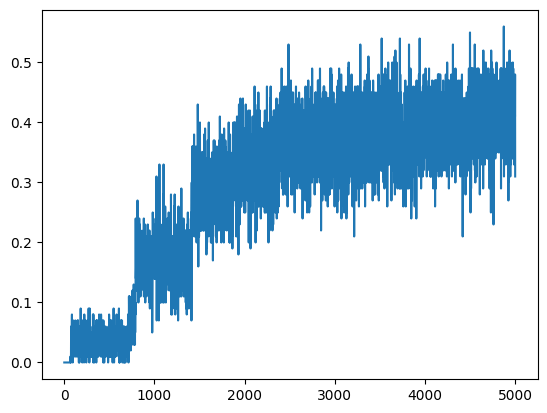

<Axes: ylabel='Count'>

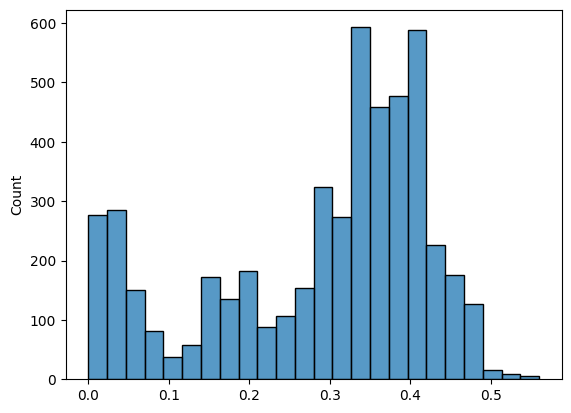

In [ ]:
plt.plot(win_pct_list_low_eps)
plt.show()
sb.histplot(win_pct_list_low_eps)


### Gradualy decrementing epsilon

In [ ]:
class Agent():
    def __init__(self, lr, gamma, n_actions, n_states, eps_start, eps_end,
                 eps_dec):
        self.lr = lr
        self.gamma = gamma
        self.n_actions = n_actions
        self.n_states = n_states
        self.epsilon = eps_start
        self.eps_min = eps_end
        self.eps_dec = eps_dec

        self.Q = {}

        self.init_Q()

    def init_Q(self):
        for state in range(self.n_states):
            for action in range(self.n_actions):
                self.Q[(state, action)] = 0.0

    def choose_action(self, state):
        # print("state", state)
        if np.random.random() < self.epsilon:
            action = np.random.choice([i for i in range(self.n_actions)])
        else:
            actions = np.array([self.Q[(state, a)] \
                                for a in range(self.n_actions)])
            # print('actions', actions)
            action = np.argmax(actions)
            # print("ACTION", action)
            # print("Q", self.Q)
            # print(" ")
        return action

    def decrement_epsilon(self):
        self.epsilon = self.epsilon*self.eps_dec if self.epsilon>self.eps_min\
                       else self.eps_min

    def learn(self, state, action, reward, state_):
        actions = np.array([self.Q[(state_, a)] for a in range(self.n_actions)])
        a_max = np.argmax(actions)

        self.Q[(state, action)] += self.lr*(reward +
                                        self.gamma*self.Q[(state_, a_max)] -
                                        self.Q[(state, action)])
        self.decrement_epsilon()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

env = gym.make('FrozenLake-v1')
agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end = 0.001,
              eps_dec = 0.99999955, n_actions = 4, n_states = 16)
# eps_end = 0.01
#decrement = 0.9999995
scores = []
win_pct_list_gradual = []
n_games = 500000

for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        agent.learn(observation, action, reward, observation_)
        score += reward
        observation = observation_
    scores.append(score)

    if i % 100 == 0:
        win_pct = np.mean(scores[-100:])
        win_pct_list_gradual.append(win_pct)
        if i % 1000 == 0:
            print('episode ', i, 'win pct %.2f' % win_pct,
                  'epsilon %.2f' % agent.epsilon)



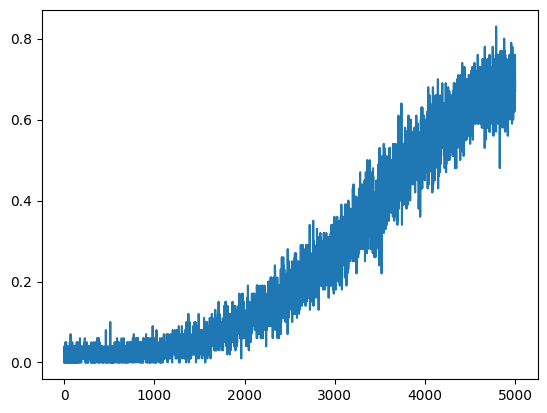

<Axes: ylabel='Count'>

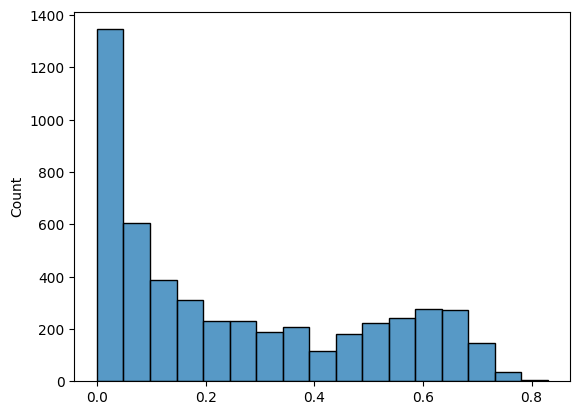

In [ ]:
plt.plot(win_pct_list_gradual)
plt.show()
sb.histplot(win_pct_list_gradual)

<Axes: ylabel='Count'>

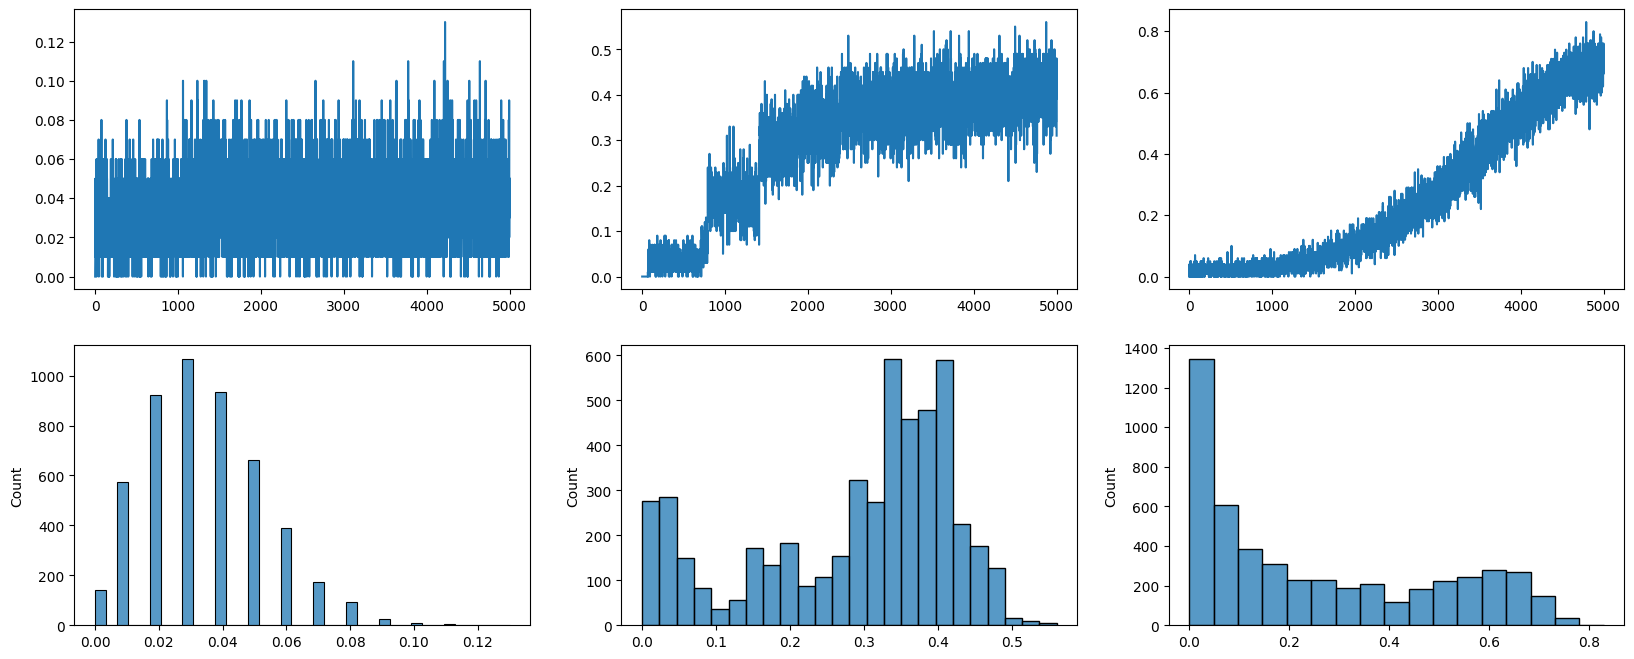

In [ ]:
# plotting results for comparison
fig, ax = plt.subplots(2,3, figsize = (20,8))
sb.lineplot(win_pct_list_high_eps, ax = ax[0,0])
sb.lineplot(win_pct_list_low_eps,  ax = ax[0,1])
sb.lineplot(win_pct_list_gradual,  ax = ax[0,2])
sb.histplot(win_pct_list_high_eps, ax = ax[1,0])
sb.histplot(win_pct_list_low_eps, ax = ax[1,1])
sb.histplot(win_pct_list_gradual, ax = ax[1,2])


## Task 3

### Discuss the effect of changing the exploration- exploitation rate on the performance of the model